# Audio Freeze Effect using AR model

In [2]:
import numpy as np
import freeze
import soundfile as sf
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
%matplotlib inline

### Parameters

In [3]:
audio_input = "data/cello_original.wav"
freeze_pos = 44100
prediction_length = 44100 * 5

### Read and show signal

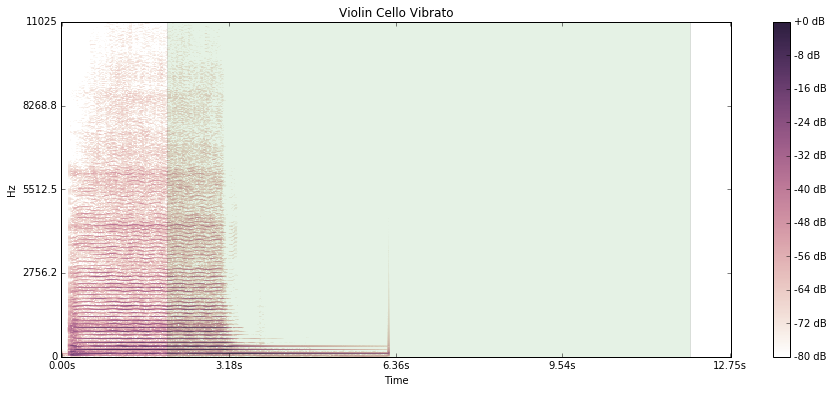

In [4]:
samples, rate = sf.read(audio_input)
# add some zeros
samples = np.concatenate([samples, np.zeros(rate*3)])
# compute STFT
D = librosa.logamplitude(np.abs(librosa.stft(samples))**2, ref_power=np.max)
# Show spectrogram
f = plt.figure(figsize=(15, 6))
librosa.display.specshow(D, y_axis='linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Violin Cello Vibrato')

p = plt.axvspan(
        librosa.samples_to_frames(freeze_pos), 
        librosa.samples_to_frames(freeze_pos + prediction_length), 
        facecolor='g', 
        alpha=0.1
)
Audio(audio_input)  

## Freeze (filter order n=1000)

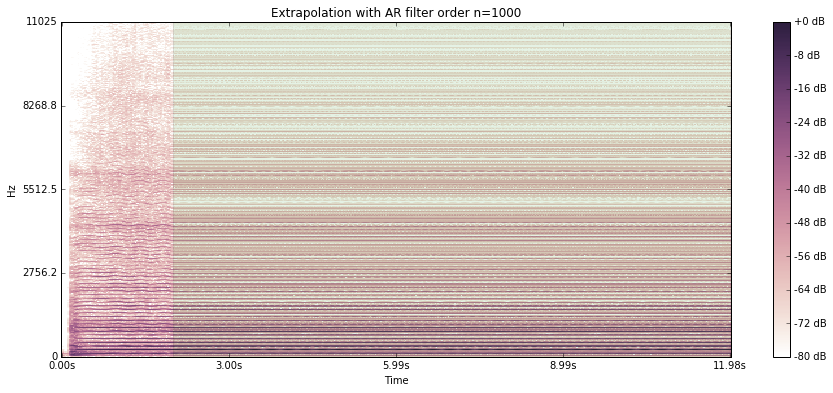

In [7]:
freeze_n1000 = freeze.extrapolate(
        samples,
        pos=freeze_pos,
        dur=prediction_length,
        n_signal=1000,
        ns_signal=1000,
        rate=rate,
)
D = librosa.logamplitude(np.abs(librosa.stft(freeze_n1000))**2, ref_power=np.max)
f = plt.figure(figsize=(15, 6))
librosa.display.specshow(D, y_axis='linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Extrapolation with AR filter order n=1000')
p = plt.axvspan(
        librosa.samples_to_frames(freeze_pos), 
        librosa.samples_to_frames(freeze_pos + prediction_length), 
        facecolor='g', 
        alpha=0.1
)
sf.write(data=freeze_n1000, file="data/cello_n1000.wav", samplerate=rate)
Audio("data/cello_n1000.wav")

## Freeze (filter order n=4000)

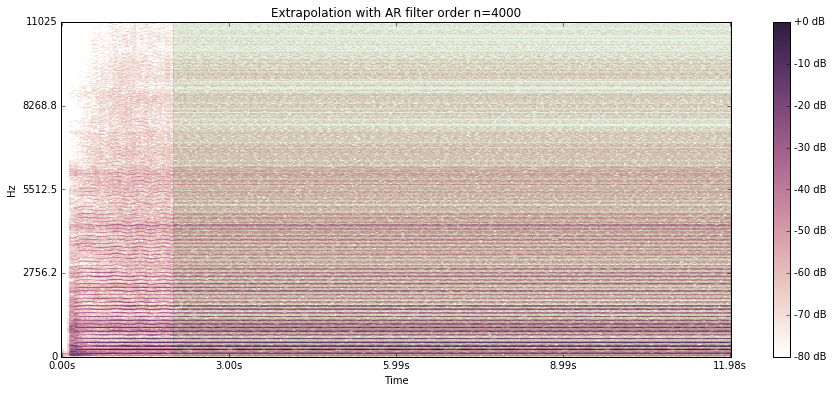

In [8]:
freeze_n4000 = freeze.extrapolate(
        samples,
        pos=freeze_pos,
        dur=prediction_length,
        n_signal=4000,
        ns_signal=4000,
        rate=rate,
)
D = librosa.logamplitude(np.abs(librosa.stft(freeze_n4000))**2, ref_power=np.max)
f = plt.figure(figsize=(15, 6))
librosa.display.specshow(D, y_axis='linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Extrapolation with AR filter order n=4000')
p = plt.axvspan(
        librosa.samples_to_frames(freeze_pos), 
        librosa.samples_to_frames(freeze_pos + prediction_length), 
        facecolor='g', 
        alpha=0.1
)
sf.write(data=freeze_n4000, file="data/cello_n4000.wav", samplerate=rate)
Audio("data/cello_n4000.wav")

## Freeze (filter order n=16000)

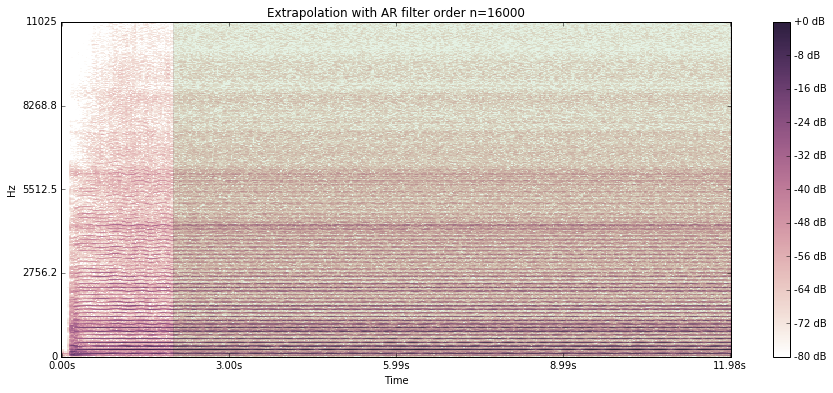

In [9]:
freeze_n16000 = freeze.extrapolate(
        samples,
        pos=freeze_pos,
        dur=prediction_length,
        n_signal=16000,
        ns_signal=16000,
        rate=rate,
)
D = librosa.logamplitude(np.abs(librosa.stft(freeze_n16000))**2, ref_power=np.max)
f = plt.figure(figsize=(15, 6))
librosa.display.specshow(D, y_axis='linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Extrapolation with AR filter order n=16000')
p = plt.axvspan(
        librosa.samples_to_frames(freeze_pos), 
        librosa.samples_to_frames(freeze_pos + prediction_length), 
        facecolor='g', 
        alpha=0.1
)
sf.write(data=freeze_n16000, file="data/cello_n16000.wav", samplerate=rate)
Audio("data/cello_n16000.wav")

## Freeze (filter order smaller than number of samples for adapation)

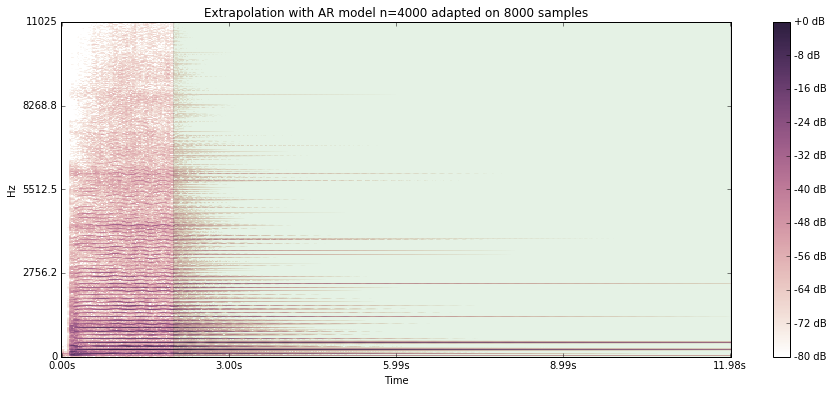

In [10]:
freeze_n = freeze.extrapolate(
        samples,
        pos=freeze_pos,
        dur=prediction_length,
        n_signal=4000,
        ns_signal=8000,
        rate=rate,
)
D = librosa.logamplitude(np.abs(librosa.stft(freeze_n))**2, ref_power=np.max)
f = plt.figure(figsize=(15, 6))
librosa.display.specshow(D, y_axis='linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Extrapolation with AR model n=4000 adapted on 8000 samples')
p = plt.axvspan(
        librosa.samples_to_frames(freeze_pos), 
        librosa.samples_to_frames(freeze_pos + prediction_length), 
        facecolor='g', 
        alpha=0.1
)
sf.write(data=freeze_n, file="data/cello_n.wav", samplerate=rate)
Audio("data/cello_n.wav")